In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("heart.csv")
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [29]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Get the values of categorical feautures

In [30]:
df_cat = df.select_dtypes(include='object')
df_cat.apply(lambda col: col.unique())

Sex                            [M, F]
ChestPainType     [ATA, NAP, ASY, TA]
RestingECG          [Normal, ST, LVH]
ExerciseAngina                 [N, Y]
ST_Slope             [Up, Flat, Down]
dtype: object

## Transformation of Sex and ExerciseAngina into numerical values

In [31]:
df.replace(to_replace = ['Y','N'],value = [1,0], inplace = True)
df.replace(to_replace = ['F','M'],value = [1,0], inplace = True)

In [38]:
# finally let's apply OHE on categorical data
df = pd.get_dummies(df, dummy_na=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,...,ChestPainType_TA,ChestPainType_nan,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,RestingECG_nan,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ST_Slope_nan
0,40,0,140,289,0,172,0,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,49,1,160,180,0,156,0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,37,0,130,283,0,98,0,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,48,1,138,214,0,108,1,1.5,1,1,...,0,0,0,1,0,0,0,1,0,0
4,54,0,150,195,0,122,0,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Correlation

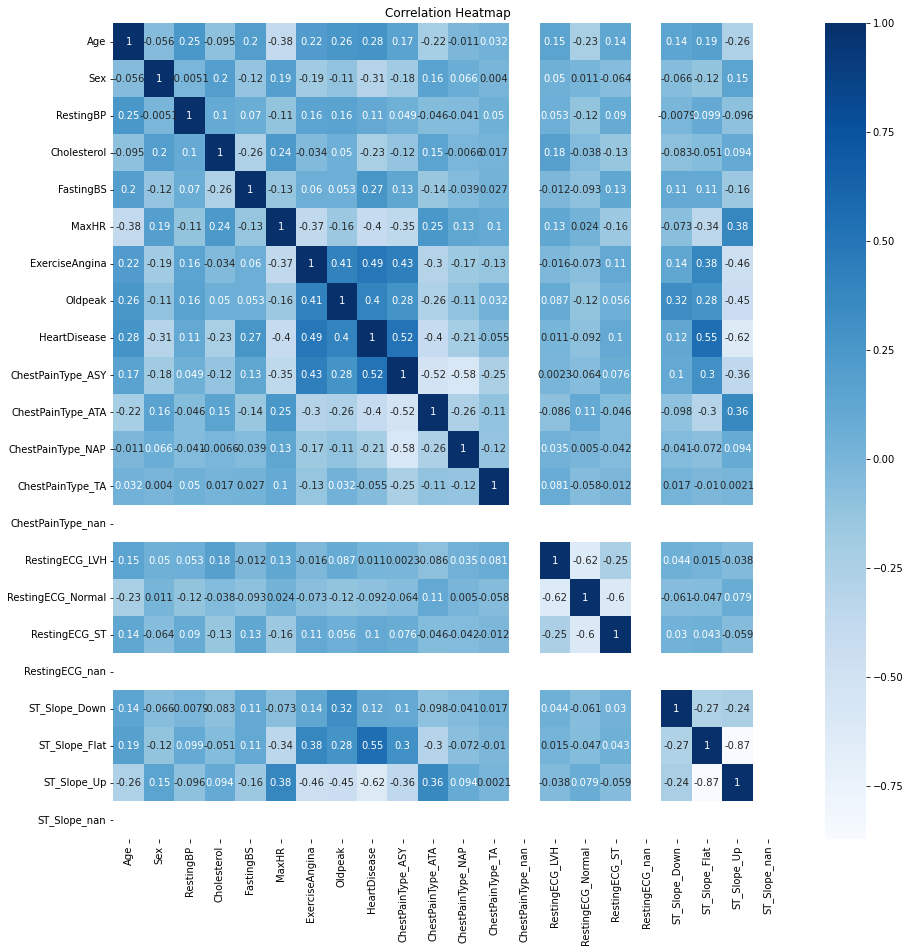

In [39]:
plt.figure(figsize=(15, 15))
plt.title("Correlation Heatmap")
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

## Searching for outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


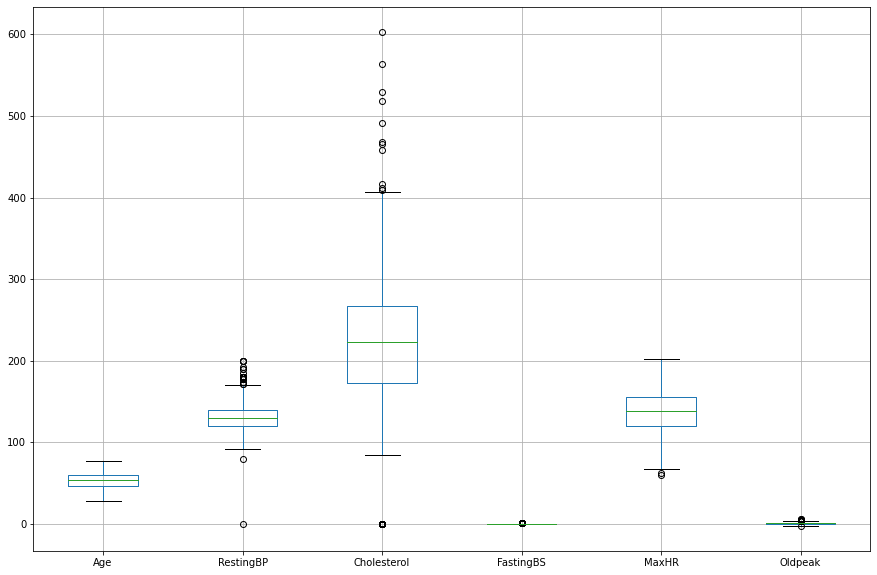

In [33]:
numeric_columns=['Age', 'RestingBP', 'Cholesterol', 'FastingBS' , 'MaxHR', 'Oldpeak']

boxplot = df.boxplot(column=numeric_columns,figsize=(15,10))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             887 non-null    int64  
 1   Sex             887 non-null    int64  
 2   ChestPainType   887 non-null    object 
 3   RestingBP       887 non-null    int64  
 4   Cholesterol     887 non-null    int64  
 5   FastingBS       887 non-null    int64  
 6   RestingECG      887 non-null    object 
 7   MaxHR           887 non-null    int64  
 8   ExerciseAngina  887 non-null    int64  
 9   Oldpeak         887 non-null    float64
 10  ST_Slope        887 non-null    object 
 11  HeartDisease    887 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 90.1+ KB


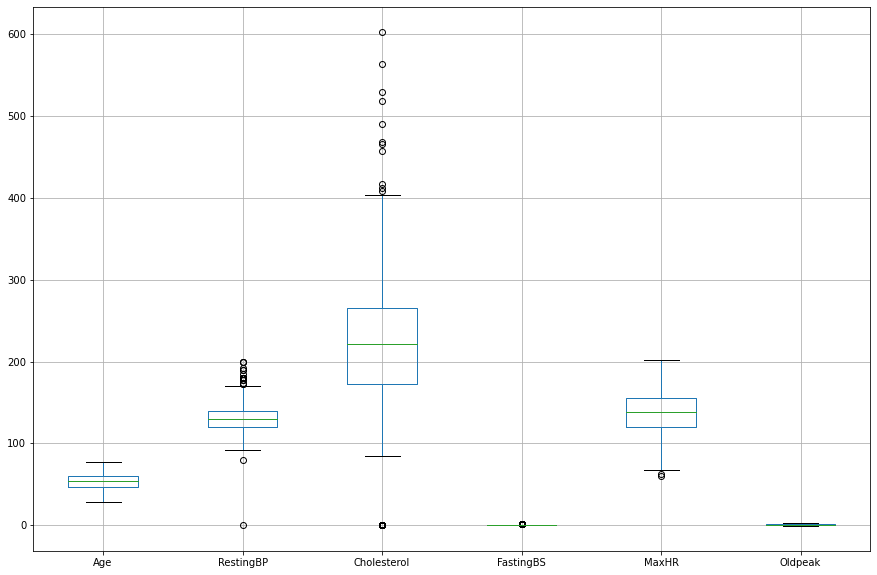

In [34]:
for column in numeric_columns:
    df1=df[np.abs(df[column]-df[column].mean())<=(2*df[column].std())]
    
boxplot = df1.boxplot(column=numeric_columns,figsize=(15,10))
df1.info()

In [35]:
df["Oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [36]:
df1["Oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  0.5,  2.5,  0.8,  0.7,  1.4,  2.1,
        0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,  2.6, -0.9,
        2.8, -0.1,  0.9,  1.1,  2.4, -1. , -1.1, -0.7, -0.8,  1.2, -0.5,
        1.9,  0.6,  2.3,  2.9])

## Check for imbalance

1    0.521786
0    0.444444
Name: HeartDisease, dtype: float64


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

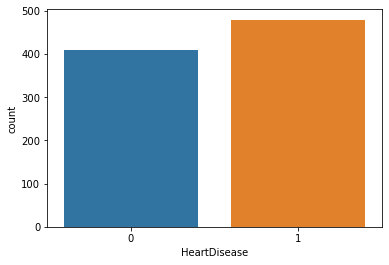

In [37]:
print(df1['HeartDisease'].value_counts()/df.shape[0])
sns.countplot(x=df1['HeartDisease'])